계산 그래프
  - 파이썬으로 작성한 코드는 -> 토치 내부에서 그래프 형식으로 변환
  - 각각의 계산과정을 독립적으로 코드블럭을 만들어둔 형태
  - 그래프 단위의 연산 -> 미분값을 각 계산단계마다 미리 저장해두고
    - 한과정이 끝나면 반대로 진행하면서 각 단계의 가중치를 업데이트

파이토치의 코딩 스타일

In [ ]:
import torch
a = torch.tensor([1,2,3])
b = torch.tensor([10,20,30])
c = a+b
c

tensor([11, 22, 33])

In [ ]:
# 파이토치 신경망
import torch.nn as nn
class Net():
  def __init__(self):
    super(Net,self).__init__()
    ## 신경망 구성요소
    ## self.dense = nn.Linear()

  def forward(self,x):
    # 신경망의 동작 요소 - 신경망 연결
    # return output
    pass

In [ ]:
# 데이터는 데이터셋 형태로 구성해서 사용
class Dataset():
  def __init__(self):
    # 필요한 데이터 불러오기
    pass
  def __len__(self):
    # 데이터 개수 반환
    # return len(data)
    pass
  def __getitem__(self, index):
    pass
    # index번째 데이터, index번째 정답
    # return data[index], label[index]

데이터 셋을 기반으로 데이터 로더를 만든다
- 배치 크기...

In [ ]:
# from typing_extensions import dataclass_transform
# # 학습 : 데이터로더로부터 데이터와 정답을 가져옴
# for data, label in DataLoder():
#   # 모델 예측값 계산
#   pred = model(data)

#   # 손실함수를 이용해서 오차를 계산
#   loss = lossfunction(pred,label)   # 파이토치에 제공하거나 직접 만든 함수(토치 텐서 형태로)

#   # 오차역전파
#   loss.backward()

#   # 실제 가중치 업데이트
#   optimizer.step()

간단한 신경망 만들기
  - 사인함수의 결과를 예측하는 신경망

In [ ]:
import math
import torch
import matplotlib.pyplot as plt

In [ ]:
# -pi -pi 1000개 cncnf
x = torch.linspace(-math.pi, math.pi, 1000) # 간격동일
y = torch.sin(x)

# 예측할 사인함수에 사용할 임의의 가중치(계수)
a = torch.randn(()); b = torch.randn(()); c = torch.randn(()); d = torch.randn(())

# 예측할 다항식을 정의
y_random = a*x**3 + b*x**2 + c*x + d

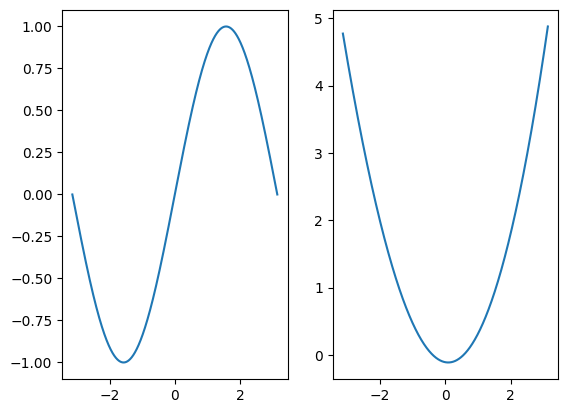

In [ ]:
plt.subplot(1,2,1)
plt.plot(x,y)  # real y

plt.subplot(1,2,2)
plt.plot(x,y_random)  # 임의의 가중치로 계산한 값

plt.show()

In [ ]:
# 예측한 값과 실제 값의 오차를 구한다
# 오차를 최소화할 수 있도록(최소화하는 방향으로)
# 각 가중치에 미분값을 업데이트 한다. - 학습률*기울기

In [ ]:
a = torch.randn(()); b = torch.randn(()); c = torch.randn(()); d = torch.randn(())

# 학습률
learning_rate = 1e-4  # 0.0001 # 임의로 지정 #주로 1e-3 0.001 사용

for epoch in range(200):
  # 예측(학습) - forward
  # a,b,c,d는 가중치
  y_pred = a*x**3 + b*x**2 + c*x + d

  # 손실정의
  loss = (y_pred - y).pow(2).sum().item()
  if epoch == 0 or epoch%100 == 0:
    print(f'epoch:{epoch} loss:{loss}')

  # 손실함수의 미분(기울기)
  grad_y_pred = 2.0 * (y_pred - y)
  # 각 가중치의 기울기
  grad_a = (grad_y_pred * x ** 3).sum()
  grad_b = (grad_y_pred * x ** 2).sum()
  grad_c = (grad_y_pred * x).sum()
  grad_d = grad_y_pred.sum()

  # 가중치 업데이트
  a -= learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

epoch:0 loss:176698.6875
epoch:100 loss:nan


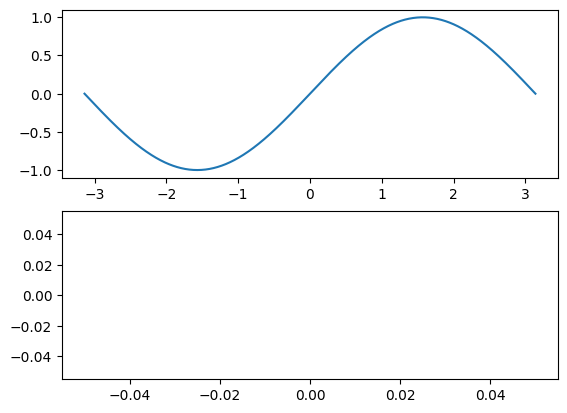

In [ ]:
plt.subplot(2,1,1)
plt.plot(x,y)  # real y

plt.subplot(2,1,2)
plt.plot(x,y_pred)  # 임의의 가중치로 계산한 값

plt.show()

자동 미분 기능을 이용해서 계산하기
 - torch의 내장 기능
 - torch tensor로 구성되어 있어야함

In [ ]:
# 초기 가중치를 계산(랜덤)
# 학습
# 오차
# 오차의 미분계수
# 각 가중치에 적용해서 즉 각 가중치에 대한 기울기
# 각 가중치 업데이트

#다시 학습을 반복

In [ ]:
a = torch.randn((), requires_grad=True)
b = torch.randn((), requires_grad=True)
c = torch.randn((), requires_grad=True)
d = torch.randn((), requires_grad=True)

# 학습률
learning_rate = 1e-6
for epoch in range(2000):
  # 예측 - forward - 전방계산
  y_pred = a*x**3 + b*x**2 + c*x +d

  # 손실정의
  loss = torch.sum((y_pred - y)**2)
  if epoch == 0 or epoch % 100 == 0:
    print(f'epoch:{epoch} loss:{loss}')
  # 기울기 - 그래디언트(손실에 대한 미분계수)
  loss.backward()

  with torch.no_grad(): # 업데이트 과정에서는 기울기를 구하지 않는다
    # 가중치 업데이트
    a -= learning_rate*grad_a
    b -= learning_rate*grad_b
    c -= learning_rate*grad_c
    d -= learning_rate*grad_d

    # 가중치를 업데잍트 한 후 그레이드를 초기화
    a.grad = None; b.grad = None; c.grad = None; d.grad = None

epoch:0 loss:35096.51953125
epoch:100 loss:nan
epoch:200 loss:nan
epoch:300 loss:nan
epoch:400 loss:nan
epoch:500 loss:nan
epoch:600 loss:nan
epoch:700 loss:nan
epoch:800 loss:nan
epoch:900 loss:nan
epoch:1000 loss:nan
epoch:1100 loss:nan
epoch:1200 loss:nan
epoch:1300 loss:nan
epoch:1400 loss:nan
epoch:1500 loss:nan
epoch:1600 loss:nan
epoch:1700 loss:nan
epoch:1800 loss:nan
epoch:1900 loss:nan


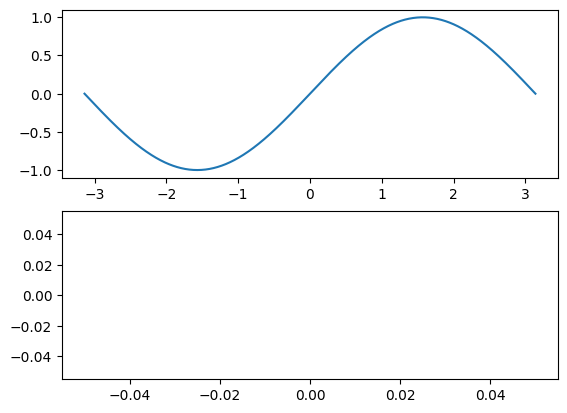

In [ ]:
plt.subplot(2,1,1)
plt.plot(x,y)  # real y

plt.subplot(2,1,2)
plt.plot(x,y_pred.detach().numpy() )  # 임의의 가중치로 계산한 값

plt.show()

Boston house 예측

In [ ]:
# from sklearn.datasets import load_boston

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


모델 정의 - 데이터 불러오기 - 손실 계산 - 오차 역전파 및 최적화
 -> 해당 과정 반복

In [ ]:
# 선형회귀 MLP 모델
import torch
import torch.nn as nn

In [ ]:
from torch.optim.adam import Adam

In [ ]:
data.shape, target.shape

((506, 13), (506,))

In [ ]:
import numpy as np
target = np.expand_dims(target,axis=-1)
target.shape

(506, 1)

In [ ]:
model = nn.Sequential(
    nn.Linear(data.shape[1], 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)
batch_size = 100
learning_rate = 1e-3

optim = Adam(model.parameters(),lr = learning_rate)

# 에포크 반복
for epoch in range(200):
  # 배치 반복
  for i in range(len(data)//batch_size):
    start = i*batch_size
    end = start + batch_size
    # 파이토치 실수형 텐서로 변환
    X = torch.FloatTensor(data[start:end])
    y = torch.FloatTensor(target[start:end])

    optim.zero_grad()   # 가중치의 기울기를 0으로 초기화
    pred = model(X)   # 모델의 예측값 ( 전방계산 - 내부적으로 각 계산과정에서의 기울기를 내장)
    loss = nn.MSELoss()(pred, y)   # 손실값 계산

    loss.backward()   # 오차역전파(각 가중치의 기울기를 계산)
    optim.step()    # 가중치 업데이트(최적화)

  if epoch == 0 or epoch % 10 == 0:
    print(f'epoch{epoch} loss:{loss.item()}')


# serWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])).
# This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
# 위와 같은 경고문이 나와서 윗 셀의 코드를 추가해주었다

epoch0 loss:270.166259765625
epoch10 loss:28.42824935913086
epoch20 loss:20.474563598632812
epoch30 loss:18.759410858154297
epoch40 loss:17.78946304321289
epoch50 loss:17.136940002441406
epoch60 loss:16.536521911621094
epoch70 loss:15.857902526855469
epoch80 loss:15.52246379852295
epoch90 loss:15.110730171203613
epoch100 loss:14.797358512878418
epoch110 loss:14.54358196258545
epoch120 loss:14.335280418395996
epoch130 loss:14.125713348388672
epoch140 loss:13.984759330749512
epoch150 loss:13.850554466247559
epoch160 loss:13.666154861450195
epoch170 loss:13.587109565734863
epoch180 loss:13.544899940490723
epoch190 loss:13.44369125366211


In [ ]:
# 성능 평가
pred = model( torch.FloatTensor( data[0] ) )
real_y = target[0]
print(pred.item(),real_y[0])

29.71421241760254 24.0


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(target[:15],model( torch.FloatTensor( data[:15])).detach().numpy( ))

20.22620181348963

분류
  - 손글씨 분류
  - MNIST
  - Transforms - ToTensor

In [ ]:
import matplotlib.pyplot as plt
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

# 학습용과 평가용 데이터
train_data = MNIST(root = './', train = True, download=True, transform = ToTensor())
test_data = MNIST(root = './', train = False, download=True, transform = ToTensor())

In [ ]:
for data,label in train_data:
  print(data.shape, label)
  break

torch.Size([1, 28, 28]) 5


In [ ]:
data.label = next(iter(train_data))
data.shape, label

(torch.Size([1, 28, 28]), 5)

In [ ]:
import torch
torch.squeeze(data).shape

torch.Size([28, 28])

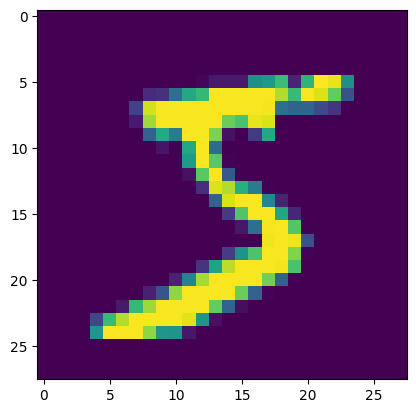

In [ ]:
plt.imshow(torch.squeeze(data))

In [ ]:
from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32,shuffle=False)

In [ ]:
# 손글씨 분류 모델 학습
import torch
import torch.nn as nn
from torch.optim.adam import Adam

# 프로세스 지정
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
model = nn.Sequential(
    nn.Linear(28*28, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

model.to(device)    # 모델의 파라메터를 GPU/CPU로 보냄

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
# 학습률
lr = 1e-3
optim = Adam(model.parameters(), lr=lr)
for epoch in range(20):
  for data,label in train_loader:  # (32,28,28) --> (32, 28*28)
    optim.zero_grad() # 가중치에 적용된 기울기를 초기화
    data = torch.reshape(data, (-1,28*28)).to(device)
    pred = model(data) # 예측
    loss = nn.CrossEntropyLoss()(pred,label.to(device))  # 손실함수
    loss.backward() # 오차역전파
    optim.step() # 가중치 실체 업데이트
  print(f'epoch:{epoch} loss:{loss.item()}')

epoch:0 loss:0.14172697067260742
epoch:1 loss:0.09085538238286972
epoch:2 loss:0.014601350761950016
epoch:3 loss:0.018221545964479446
epoch:4 loss:0.020707054063677788
epoch:5 loss:0.05877915397286415
epoch:6 loss:0.03282097727060318
epoch:7 loss:0.06697889417409897
epoch:8 loss:0.0025313799269497395
epoch:9 loss:0.006376309785991907
epoch:10 loss:0.013986444100737572
epoch:11 loss:0.010633702389895916
epoch:12 loss:0.012152203358709812
epoch:13 loss:0.11746654659509659
epoch:14 loss:0.011102081276476383
epoch:15 loss:0.023678645491600037
epoch:16 loss:0.002635350450873375
epoch:17 loss:0.07372535765171051
epoch:18 loss:0.0010171266039833426
epoch:19 loss:0.0005503454594872892


In [ ]:
##############GPT#####################
# 학습률
lr = 1e-3
optim = Adam(model.parameters(), lr=lr)
for epoch in range(20):
    for data, label in train_loader: # (32,28,28) --> (32, 28*28)
        optim.zero_grad() # 가중치에 적용된 기울기를 초기화
        data = torch.reshape(data, (-1,28*28)).to(device)
        pred = model(data)    # 예측
        loss = nn.CrossEntropyLoss()(pred, torch.tensor(label).to(device))   # 손실함수
        loss.backward()   # 오차역전파
        optim.step()    # 가중치 실체 업데이트
    print(f'epoch:{epoch} loss:{loss.item()}')


<ipython-input-71-1c012d851eb9>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = nn.CrossEntropyLoss()(pred, torch.tensor(label).to(device))   # 손실함수


epoch:0 loss:8.541123679606244e-05
epoch:1 loss:0.00012869859347119927
epoch:2 loss:2.3220220100483857e-05
epoch:3 loss:0.00026703995536081493
epoch:4 loss:2.145736743841553e-06
epoch:5 loss:0.007976986467838287
epoch:6 loss:0.07032832503318787
epoch:7 loss:2.3431889530911576e-06
epoch:8 loss:7.561704478575848e-06
epoch:9 loss:0.0018435680540278554
epoch:10 loss:0.026174355298280716
epoch:11 loss:0.00016960647189989686
epoch:12 loss:0.00040020595770329237
epoch:13 loss:0.0011388194980099797
epoch:14 loss:2.2701437046634965e-05
epoch:15 loss:0.003303552744910121
epoch:16 loss:2.7976545879937476e-06
epoch:17 loss:0.01367519423365593
epoch:18 loss:3.443631430855021e-05
epoch:19 loss:8.574852108722553e-05


In [ ]:
torch.save(model.state_dict(), 'MNIST_torch.pth')   # 모델의 가중치 저장

In [ ]:
# 모델의 가중치 불러오기
model.load_state_dict(torch.load('MNIST_torch.pth', map_location=device))

<All keys matched successfully>

In [ ]:
num_correct = 0    # 맞춘 갯수
# 기울기 계산 금지
with torch.no_grad():
  for data,label in test_loader:
    data = torch.reshape(data, (-1, 28*28)).to(device)
    output = model(data)
    pred = output.data.max(1)[1]    # 2차원 데이터의 전체 max(1) --> 10개 중에 최대값과 최대값일때의index
    corr = pred.eq(label.to(device).data).sum().item()
    num_correct += corr
  print(f'정확도 : {num_correct / len(test_data)}') # 정확도

정확도 : 0.9742


물고기

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head(5)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
# 기술 통계
fish.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
fish.iloc[:,1:].corr()

,Weight,Length,Diagonal,Height,Width
Weight,1.000000,0.918618,0.923044,0.724345,0.886507
Length,0.918618,1.000000,0.994103,0.640441,0.873547
Diagonal,0.923044,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.873547,0.878520,0.792881,1.000000


In [ ]:
import seaborn as sns

<Axes: >

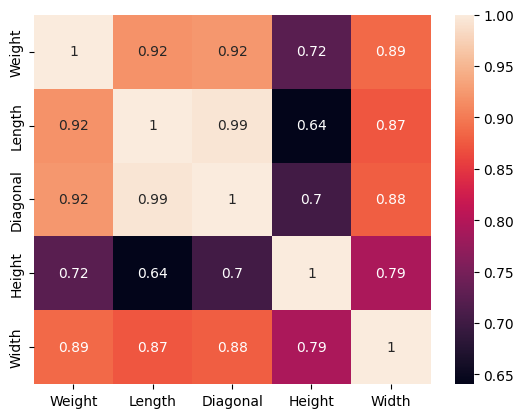

In [ ]:
sns.heatmap(fish.iloc[:,1:].corr(), annot=True)

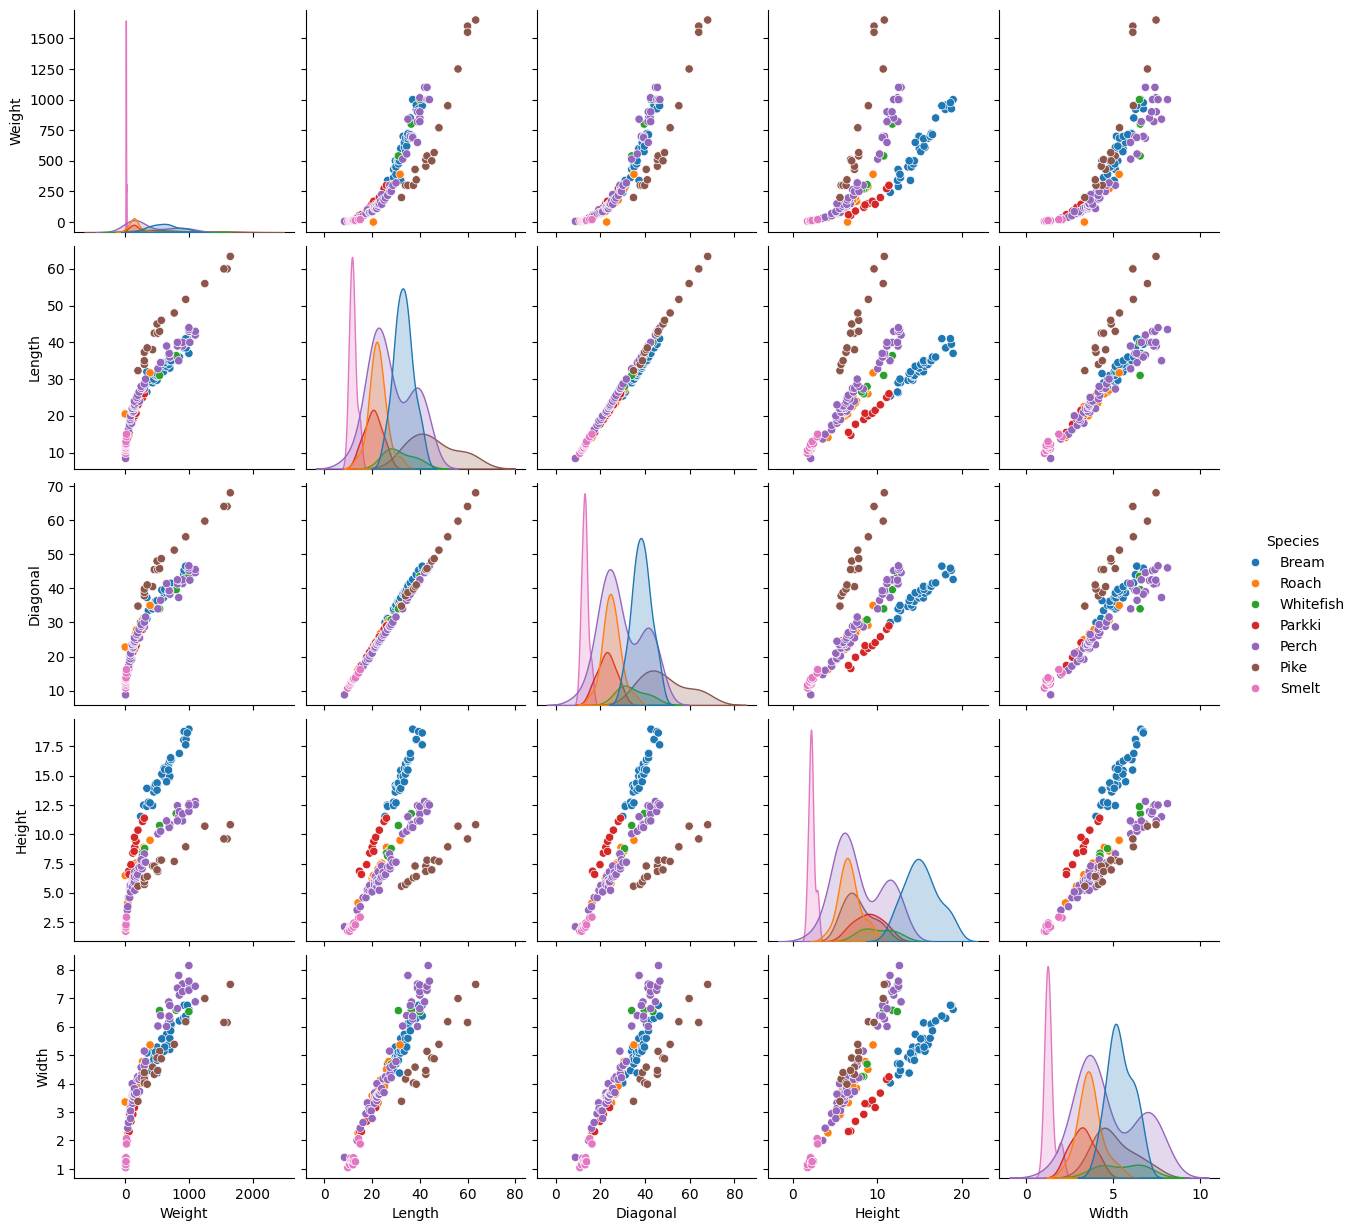

In [ ]:
sns.pairplot(fish, hue='Species')

pytorch

In [ ]:
# numpy -> torch
pydata = [[1,2],[3,4]]
x_data = torch.tensor(pydata)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
import numpy as np

np_array = np.array(pydata)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
x_ones = torch.ones_like(x_np)
x_ones

tensor([[1, 1],
        [1, 1]])

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [ ]:
zeros_tensor.shape

torch.Size([2, 3])

In [ ]:
zeros_tensor.device

device(type='cpu')

In [ ]:
zeros_tensor, zeros_tensor.shape

(tensor([[0., 0., 0.],
         [0., 0., 0.]]),
 torch.Size([2, 3]))

In [ ]:
torch.cat([rand_tensor,ones_tensor,zeros_tensor], dim=0)

tensor([[0.3894, 0.1955, 0.4487],
        [0.0300, 0.9772, 0.1237],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])

In [ ]:
torch.cat([rand_tensor, ones_tensor, zeros_tensor],dim=1)

tensor([[0.3894, 0.1955, 0.4487, 1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000],
        [0.0300, 0.9772, 0.1237, 1.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000]])

In [ ]:
temp = torch.cat([rand_tensor,ones_tensor,zeros_tensor], dim=1)
temp.shape, temp.view(9,2).shape, temp.reshape(9,2).shape

(torch.Size([2, 9]), torch.Size([9, 2]), torch.Size([9, 2]))

예측에 적합한 선형성이 가장 높은 변수를 선택
  - 선형모델
    - x,y 한개씩 선정

In [ ]:
# Length Diagonal
# X,y 로 분리
# 모델 생성
# 옵티 마이저
# 학습률, 배치사이즈
# 에포크
# 손실함수 MSELoss
# 역전파
# 적용

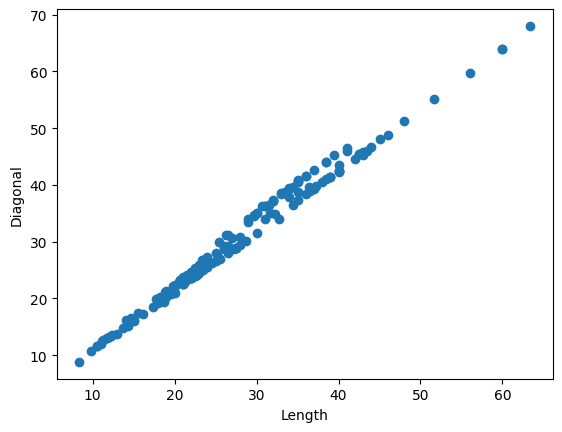

In [ ]:
X = fish['Length']
Y = fish['Diagonal']
plt.scatter(X,Y)
plt.xlabel('Length')
plt.ylabel('Diagonal')
plt.show()

In [ ]:
 X = torch.FloatTensor(X)
 Y = torch.FloatTensor(Y)
 X.shape, Y.shape

(torch.Size([159]), torch.Size([159]))

In [ ]:
X.reshape(-1,1).shape, X.unsqueeze(1).shape

(torch.Size([159, 1]), torch.Size([159, 1]))

In [ ]:
X = X.unsqueeze(1)
Y = Y.unsqueeze(1)

In [ ]:
X.shape, Y.shape

(torch.Size([159, 1]), torch.Size([159, 1]))

In [ ]:
from torch.optim.adam import Adam

# 모델정의
model = nn.Sequential(
    nn.Linear(1,10),
    nn.ReLU(),
    nn.Linear(10,10),
    nn.ReLU(),
    nn.Linear(10,1)
)

batch_size = 18
learning_rate = 1e-4    # 보폭이 커지면 loss가 다시 증가할 수 있음 중
optim = Adam(model.parameters(), lr = learning_rate)

# 학습
for epoch in range(200):
  # 배치반복
  for i in range(len(X)//batch_size):
    start = i*batch_size
    end = start + batch_size
    x = torch.FloatTensor(X[start:end])
    x = x.unsqueeze(1)
    y = torch.FloatTensor(Y[start:end])
    y = y.unsqueeze(1)

    optim.zero_grad()

    pred = model(x)
    loss = nn.MSELoss()(pred, y)
    loss.backward()
    optim.step()
  if epoch == 0 or epoch%10 == 0:
    print(f'epoch:{epoch} loss:{loss.item()}')

epoch:0 loss:1045.3516845703125
epoch:10 loss:940.4752807617188
epoch:20 loss:834.1608276367188
epoch:30 loss:727.3871459960938
epoch:40 loss:622.111083984375
epoch:50 loss:520.5634765625
epoch:60 loss:425.0004577636719
epoch:70 loss:337.5047302246094
epoch:80 loss:259.8006591796875
epoch:90 loss:193.09446716308594
epoch:100 loss:137.95579528808594
epoch:110 loss:94.26444244384766
epoch:120 loss:61.23943328857422
epoch:130 loss:37.55839157104492
epoch:140 loss:21.549680709838867
epoch:150 loss:11.424654960632324
epoch:160 loss:5.496039390563965
epoch:170 loss:2.337488889694214
epoch:180 loss:0.8599206805229187
epoch:190 loss:0.3097091615200043


물고기 품종 분류

In [ ]:
from torch.optim.adam import Adam
import torch.nn as ann
from sklearn.preprocessing import LabelEncoder

X = fish.iloc[:, 1:].to_numpy()
Y = fish.iloc[:,0].to_numpy()
Y = LabelEncoder().fit_transform(Y)
class_num = len(np.unique(Y))

# 모델정의
model = nn.Sequential(
    nn.Linear(X.shape[-1],20),
    nn.ReLU(),
    nn.Linear(20,10),
    nn.ReLU(),
    nn.Linear(10,class_num)
)

batch_size = 18
learning_rate = 1e-3
optim = Adam(model.parameters(), lr=learning_rate)
# 학습
for epoch in range(1000):
  #  배치반복
  for i in range(len(X)//batch_size):
    start = i*batch_size
    end = start + batch_size
    x = torch.FloatTensor(X[start:end])
    y = torch.LongTensor(Y[start:end])

    optim.zero_grad()
    pred = model(x)

    loss = nn.CrossEntropyLoss()(pred, y)
    loss.backward()
    optim.step()
  if epoch==0 or epoch%50==0:
    print(f'epoch:{epoch} loss:{loss.item()}')

epoch:0 loss:52.62350845336914
epoch:50 loss:2.469896078109741
epoch:100 loss:2.2457146644592285
epoch:150 loss:2.040435314178467
epoch:200 loss:1.8648228645324707
epoch:250 loss:1.717347502708435
epoch:300 loss:1.5786913633346558
epoch:350 loss:1.442713737487793
epoch:400 loss:1.3081793785095215
epoch:450 loss:1.1796118021011353
epoch:500 loss:1.0437113046646118
epoch:550 loss:0.9090670347213745
epoch:600 loss:0.7810307145118713
epoch:650 loss:0.6526833772659302
epoch:700 loss:0.5437943935394287
epoch:750 loss:0.4479851722717285
epoch:800 loss:0.36654549837112427
epoch:850 loss:0.3319467604160309
epoch:900 loss:0.24967758357524872
epoch:950 loss:0.19775043427944183
